In [1]:

import pandas as pd
import plotly.express as px
import altair as alt

In [2]:
df = pd.read_csv('parcoursup.csv', delimiter=";")

In [3]:
df.tail()

,session,contrat_etab,cod_uai,g_ea_lib_vx,dep,dep_lib,region_etab_aff,acad_mies,ville_etab,lib_for_voe_ins,...,tri,cod_aff_form,detail_forma2,lien_form_psup,taux_acces_ens,part_acces_gen,part_acces_tec,part_acces_pro,etablissement_id_paysage,composante_id_paysage
13639,2022,Public,0540076P,Lycée Jean Zay,54,Meurthe-et-Moselle,Grand Est,Nancy-Metz,Jarny,BTS - Production - Aéronautique,...,2_Lycées,20966,NaN,https://dossier.parcoursup.fr/Candidats/public...,42.0,71.0,27.0,2.0,NaN,NaN
13640,2022,Public,0370053G,Lycée professionnel Gustave Eiffel,37,Indre-et-Loire,Centre-Val de Loire,Orléans-Tours,Tours,BTS - Production - Conception de produits indu...,...,2_Lycées,20980,NaN,https://dossier.parcoursup.fr/Candidats/public...,70.0,10.0,81.0,9.0,NaN,NaN
13641,2022,Public,0597065J,Université de Lille,59,Nord,Hauts-de-France,Lille,Lille,Licence - Science politique - Parcours Science...,...,1_universités,21081,NaN,https://dossier.parcoursup.fr/Candidats/public...,7.0,100.0,0.0,0.0,U8a0v,NaN
13642,2022,Public,0290346U,Université de Brest,29,Finistère,Bretagne,Rennes,Brest,Licence - Arts - Parcours pratique danse,...,1_universités,21175,NaN,https://dossier.parcoursup.fr/Candidats/public...,43.0,88.0,12.0,0.0,06SE7,NaN
13643,2022,Public,0511296G,Université de Reims Champagne-Ardenne,51,Marne,Grand Est,Reims,Reims,Licence - Arts - Parcours Arts du spectacle vi...,...,1_universités,21192,NaN,https://dossier.parcoursup.fr/Candidats/public...,68.0,89.0,9.0,2.0,57OsX,NaN


In [4]:
df.shape

(13644, 118)

In [5]:
chunk_size = 10 
for i in range(0, len(df.columns), chunk_size):
    print(df.columns[i:i+chunk_size])

Index(['session', 'contrat_etab', 'cod_uai', 'g_ea_lib_vx', 'dep', 'dep_lib',
       'region_etab_aff', 'acad_mies', 'ville_etab', 'lib_for_voe_ins'],
      dtype='object')
Index(['select_form', 'fili', 'lib_comp_voe_ins', 'form_lib_voe_acc',
       'fil_lib_voe_acc', 'detail_forma', 'g_olocalisation_des_formations',
       'capa_fin', 'voe_tot', 'voe_tot_f'],
      dtype='object')
Index(['nb_voe_pp', 'nb_voe_pp_internat', 'nb_voe_pp_bg', 'nb_voe_pp_bg_brs',
       'nb_voe_pp_bt', 'nb_voe_pp_bt_brs', 'nb_voe_pp_bp', 'nb_voe_pp_bp_brs',
       'nb_voe_pp_at', 'nb_voe_pc'],
      dtype='object')
Index(['nb_voe_pc_bg', 'nb_voe_pc_bt', 'nb_voe_pc_bp', 'nb_voe_pc_at',
       'nb_cla_pp', 'nb_cla_pc', 'nb_cla_pp_internat', 'nb_cla_pp_pasinternat',
       'nb_cla_pp_bg', 'nb_cla_pp_bg_brs'],
      dtype='object')
Index(['nb_cla_pp_bt', 'nb_cla_pp_bt_brs', 'nb_cla_pp_bp', 'nb_cla_pp_bp_brs',
       'nb_cla_pp_at', 'prop_tot', 'acc_tot', 'acc_tot_f', 'acc_pp', 'acc_pc'],
      dtype='object')
I

In [6]:
df['detail_forma2'].isnull().sum()

12982

In [7]:
df.isnull().sum()

session                         0
contrat_etab                    0
cod_uai                         0
g_ea_lib_vx                     0
dep                             0
                            ...  
part_acces_gen                 32
part_acces_tec                 32
part_acces_pro                 32
etablissement_id_paysage     7143
composante_id_paysage       13424
Length: 118, dtype: int64

In [8]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f'Column: {col}, Null Count: {null_count}')

Column: session, Null Count: 0
Column: contrat_etab, Null Count: 0
Column: cod_uai, Null Count: 0
Column: g_ea_lib_vx, Null Count: 0
Column: dep, Null Count: 0
Column: dep_lib, Null Count: 0
Column: region_etab_aff, Null Count: 0
Column: acad_mies, Null Count: 0
Column: ville_etab, Null Count: 0
Column: lib_for_voe_ins, Null Count: 0
Column: select_form, Null Count: 0
Column: fili, Null Count: 0
Column: lib_comp_voe_ins, Null Count: 0
Column: form_lib_voe_acc, Null Count: 0
Column: fil_lib_voe_acc, Null Count: 0
Column: detail_forma, Null Count: 9682
Column: g_olocalisation_des_formations, Null Count: 0
Column: capa_fin, Null Count: 0
Column: voe_tot, Null Count: 0
Column: voe_tot_f, Null Count: 0
Column: nb_voe_pp, Null Count: 0
Column: nb_voe_pp_internat, Null Count: 12670
Column: nb_voe_pp_bg, Null Count: 0
Column: nb_voe_pp_bg_brs, Null Count: 0
Column: nb_voe_pp_bt, Null Count: 0
Column: nb_voe_pp_bt_brs, Null Count: 0
Column: nb_voe_pp_bp, Null Count: 0
Column: nb_voe_pp_bp_brs, 

## Columns cleaning

In [9]:
data = df[['contrat_etab', 'g_ea_lib_vx', 'dep', 'dep_lib', 'region_etab_aff',
       'acad_mies', 'ville_etab', 'lib_for_voe_ins', 'select_form', 'fili',
       'form_lib_voe_acc', 'fil_lib_voe_acc', 'g_olocalisation_des_formations',
       'capa_fin', 'voe_tot', 'voe_tot_f', 'nb_voe_pp', 'nb_voe_pp_bg',
       'nb_voe_pp_bt', 'nb_voe_pp_bp', 'nb_voe_pc', 'nb_voe_pc_bg',
       'nb_voe_pc_bt', 'nb_voe_pc_bp', 'prop_tot', 'acc_tot', 'acc_tot_f',
       'acc_pp', 'acc_pc', 'acc_debutpp', 'acc_finpp', 'acc_brs', 'acc_neobac',
       'acc_bg', 'acc_bt', 'acc_bp','acc_at',
       'acc_sansmention', 'acc_ab', 'acc_b', 'acc_tb',
       'acc_bg_mention', 'acc_bt_mention', 'acc_bp_mention', 'pct_acc_debutpp',
       'pct_acc_finpp', 'pct_f', 'pct_aca_orig', 'pct_aca_orig_idf',
       'pct_bours', 'pct_neobac', 'pct_mention_nonrenseignee',
       'pct_sansmention', 'pct_ab', 'pct_b', 'pct_tb', 'pct_tbf', 'pct_bg',
       'pct_bt', 'pct_bp']]

In [10]:
data.shape

(13644, 60)

In [11]:
regions_metropole = ['Ile-de-France','Corse','Occitanie','Grand Est','Auvergne-Rhône-Alpes'
,'Hauts-de-France','Provence-Alpes-Côte d’Azur','Normandie',
 'Centre-Val de Loire','Bourgogne-Franche-Comté','Nouvelle-Aquitaine',
 'Pays de la Loire','Bretagne'] 

data.loc[data['region_etab_aff'].isin(regions_metropole) == False, 'region_etab_aff'] = 'Overseas'

In [12]:
data.head()

,contrat_etab,g_ea_lib_vx,dep,dep_lib,region_etab_aff,acad_mies,ville_etab,lib_for_voe_ins,select_form,fili,...,pct_neobac,pct_mention_nonrenseignee,pct_sansmention,pct_ab,pct_b,pct_tb,pct_tbf,pct_bg,pct_bt,pct_bp
0,Public,Université Paris Nanterre,92,Hauts-de-Seine,Ile-de-France,Versailles,Nanterre,Licence - Langues étrangères appliquées - Parc...,formation non sélective,Licence,...,77.0,0.0,26.0,54.0,15.0,5.0,0.0,77.0,17.0,6.0
1,Public,Lycée Leonard De Vinci,92,Hauts-de-Seine,Ile-de-France,Versailles,Levallois-Perret,BTS - Services - Gestion de la PME,formation sélective,BTS,...,79.0,0.0,22.0,26.0,48.0,4.0,0.0,13.0,39.0,48.0
2,Public,Ecole Universitaire de premier cycle - Campus ...,92,Hauts-de-Seine,Ile-de-France,Versailles,Sceaux,Licence - Portail Droit - Parcours Droit,formation non sélective,Licence,...,91.0,0.0,10.0,47.0,38.0,4.0,0.0,90.0,7.0,3.0
3,Public,Ecole Universitaire de premier cycle - Campus ...,92,Hauts-de-Seine,Ile-de-France,Versailles,Sceaux,Licence - Double diplôme - Licence Droit - Par...,formation sélective,Licence,...,95.0,0.0,10.0,24.0,43.0,24.0,0.0,100.0,0.0,0.0
4,Privé sous contrat d'association,Lycée Montalembert,92,Hauts-de-Seine,Ile-de-France,Versailles,Courbevoie,BTS - Services - Commerce International,formation sélective,BTS,...,61.0,0.0,53.0,18.0,29.0,0.0,0.0,47.0,41.0,12.0


In [13]:
import streamlit as st
df['overcrowding_ratio'] = df['acc_tot'] / df['capa_fin']
fig = px.bar(df, x='region_etab_aff', y='overcrowding_ratio', title='Overcrowding Ratio by Region', color='region_etab_aff')
fig.update_xaxes(title_text='Region')
fig.update_yaxes(title_text='Overcrowding Ratio')
fig.update_layout(showlegend=True)
st.plotly_chart(fig)
    

2023-10-16 02:55:01.674 
  command:

    streamlit run /Users/ravalisaonajohanna/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

### Separating the latitude and longitude 

In [20]:
split_data = data['g_olocalisation_des_formations'].str.split(',', expand=True)
data['lat'] = split_data[0].astype(float)
data['long'] = split_data[1].astype(float)

/var/folders/bc/10n93dns7k7cwzf7txmb7tmm0000gn/T/ipykernel_19097/2650195520.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bc/10n93dns7k7cwzf7txmb7tmm0000gn/T/ipykernel_19097/2650195520.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
data.shape

(13644, 62)

In [26]:
data.columns

Index(['contrat_etab', 'g_ea_lib_vx', 'dep', 'dep_lib', 'region_etab_aff',
       'acad_mies', 'ville_etab', 'lib_for_voe_ins', 'select_form', 'fili',
       'form_lib_voe_acc', 'fil_lib_voe_acc', 'g_olocalisation_des_formations',
       'capa_fin', 'voe_tot', 'voe_tot_f', 'nb_voe_pp', 'nb_voe_pp_bg',
       'nb_voe_pp_bt', 'nb_voe_pp_bp', 'nb_voe_pc', 'nb_voe_pc_bg',
       'nb_voe_pc_bt', 'nb_voe_pc_bp', 'prop_tot', 'acc_tot', 'acc_tot_f',
       'acc_pp', 'acc_pc', 'acc_debutpp', 'acc_finpp', 'acc_brs', 'acc_neobac',
       'acc_bg', 'acc_bt', 'acc_bp', 'acc_at', 'acc_sansmention', 'acc_ab',
       'acc_b', 'acc_tb', 'acc_bg_mention', 'acc_bt_mention', 'acc_bp_mention',
       'pct_acc_debutpp', 'pct_acc_finpp', 'pct_f', 'pct_aca_orig',
       'pct_aca_orig_idf', 'pct_bours', 'pct_neobac',
       'pct_mention_nonrenseignee', 'pct_sansmention', 'pct_ab', 'pct_b',
       'pct_tb', 'pct_tbf', 'pct_bg', 'pct_bt', 'pct_bp', 'lat', 'long'],
      dtype='object')

In [27]:
unique_formations = df['fili'].unique()
print(unique_formations)


['Licence' 'BTS' 'BUT' 'CPGE' 'Autre formation' 'Ecole de Commerce'
 "Ecole d'Ingénieur" 'IFSI' 'EFTS' 'Licence_Las' 'PASS']


In [32]:
data.to_csv('parcoursup_copie3.csv', sep=';')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


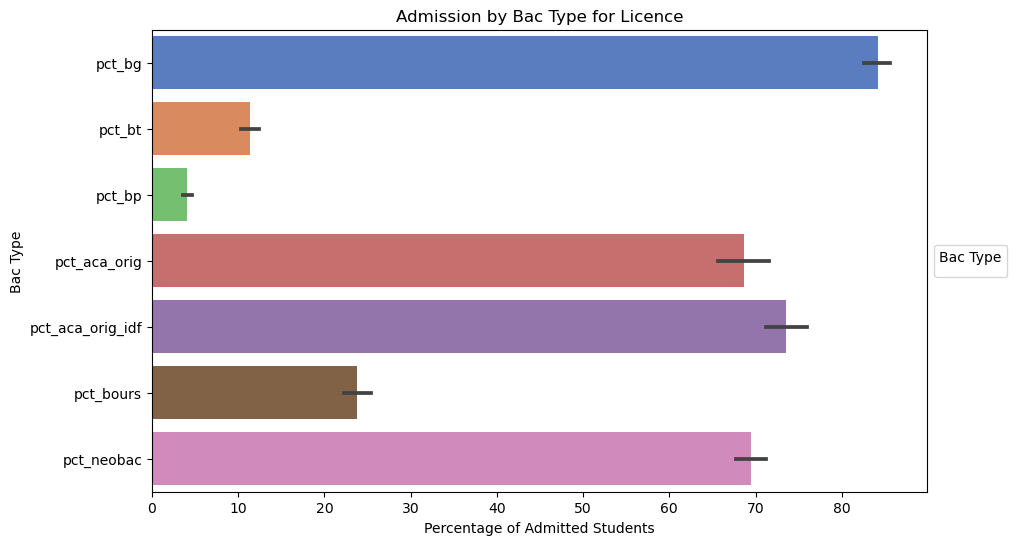

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


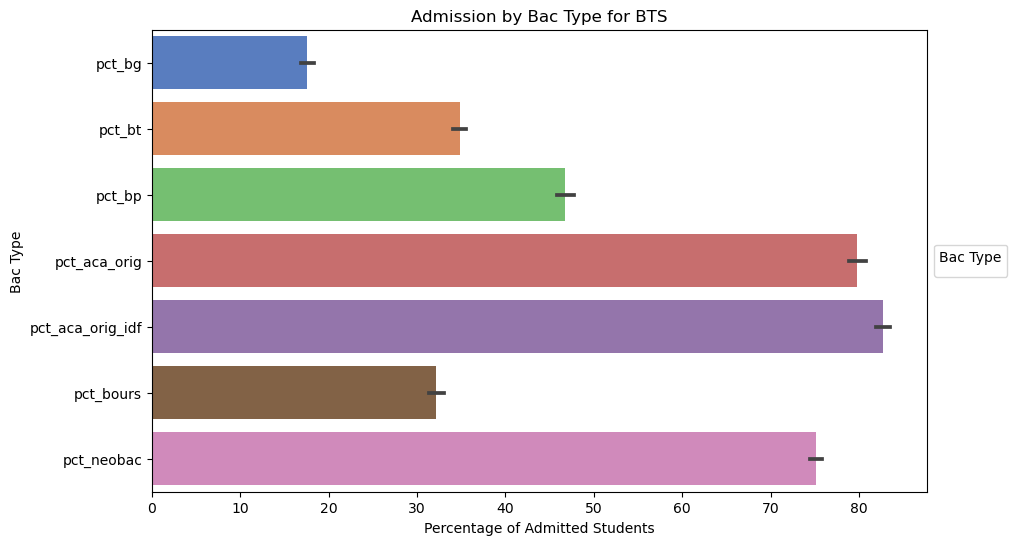

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


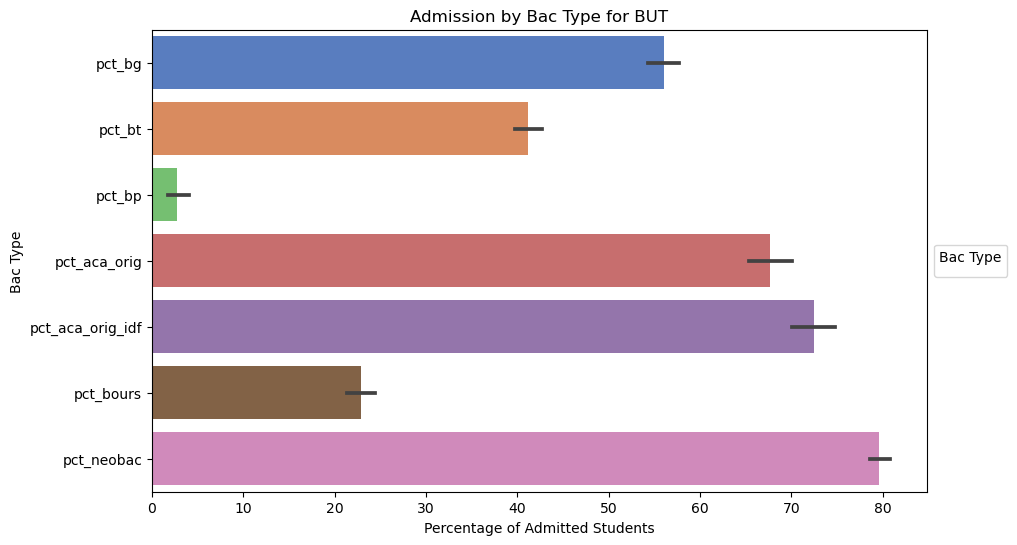

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


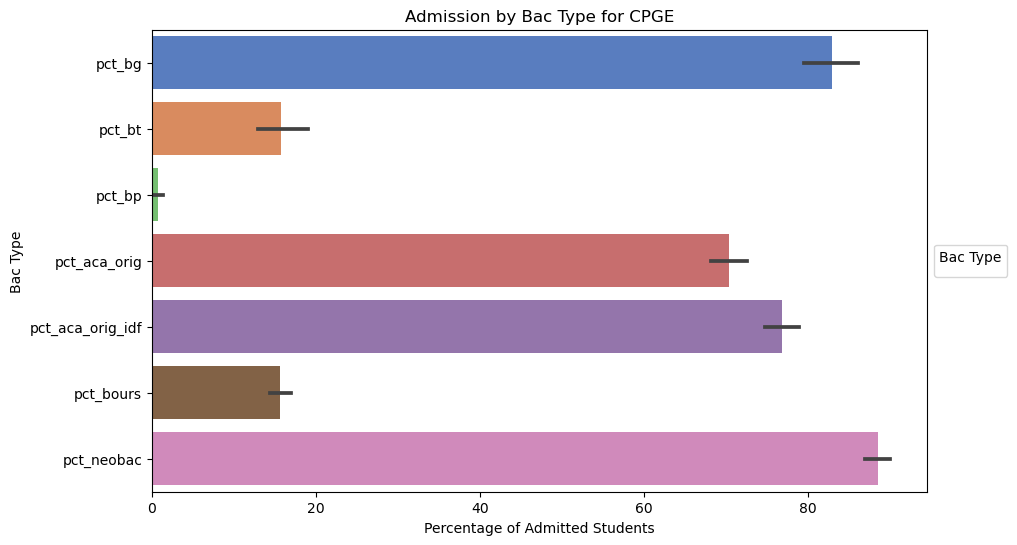

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


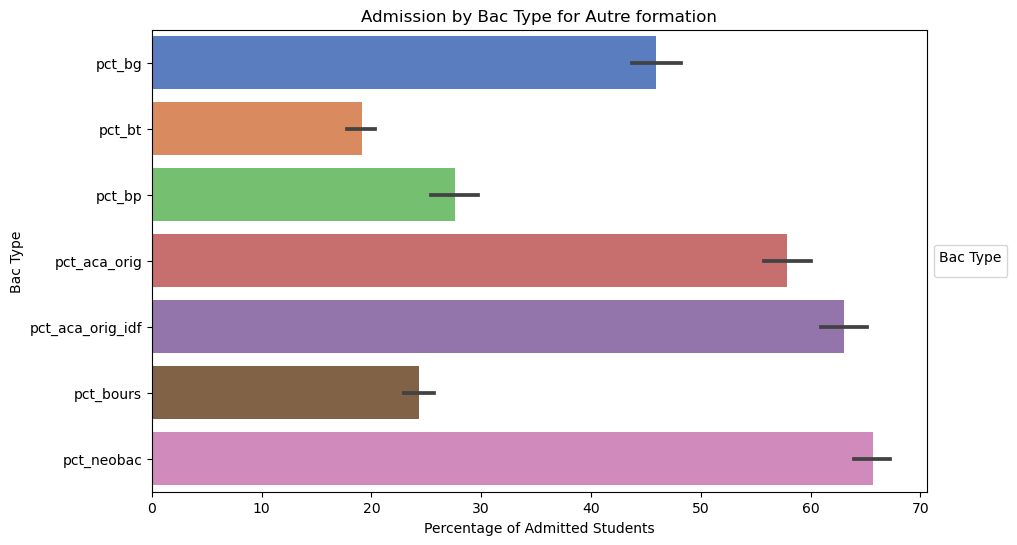

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


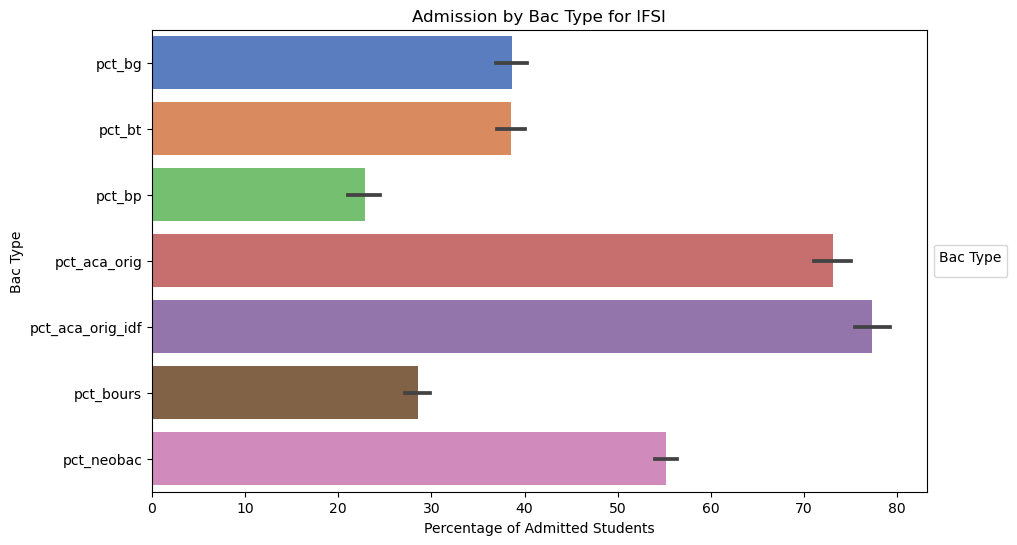

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


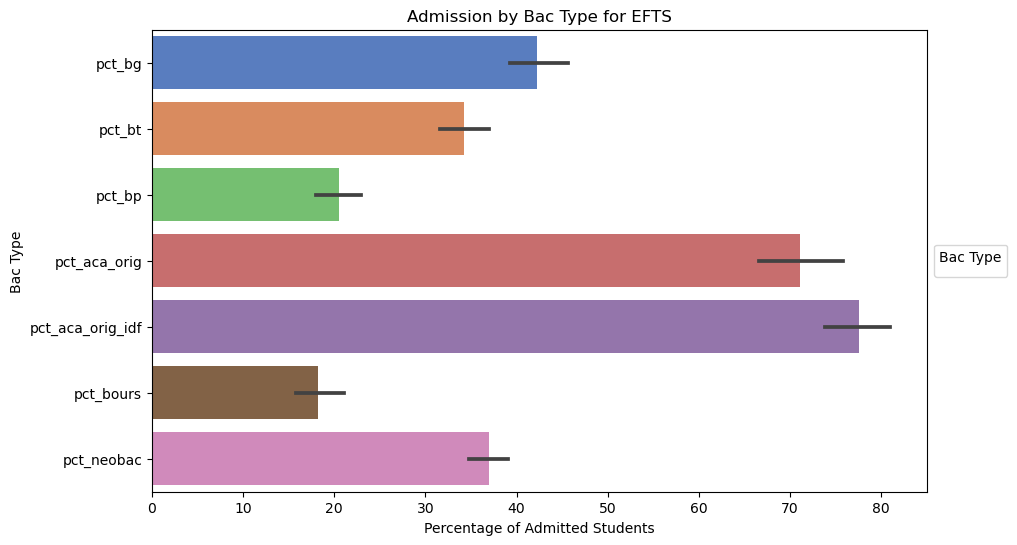

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


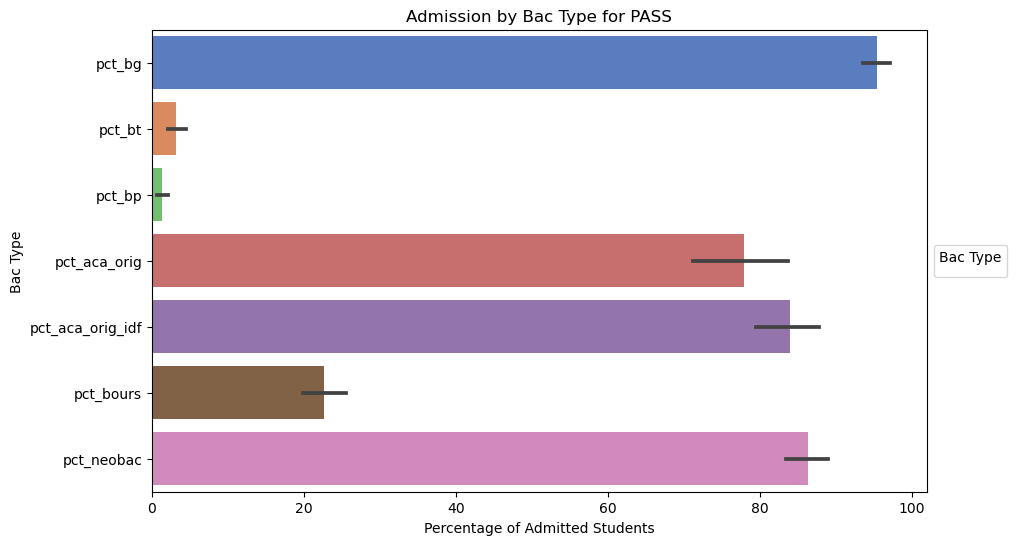

In [29]:

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
formation_types = ['Licence', 'BTS', 'BUT', 'CPGE', 'Autre formation', 'IFSI', 'EFTS', 'PASS']

for formation_type in formation_types:
    filtered_data = data[data['fili'] == formation_type]
    grouped_data = filtered_data.groupby('g_ea_lib_vx')[['pct_bg', 'pct_bt', 'pct_bp', 'pct_aca_orig', 'pct_aca_orig_idf', 'pct_bours', 'pct_neobac']].mean()
        
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_data, orient='h', palette="muted")
        
    plt.xlabel("Percentage of Admitted Students")
    plt.ylabel("Bac Type")
    plt.title(f"Admission by Bac Type for {formation_type}")
    plt.legend(title="Bac Type", loc="center left", bbox_to_anchor=(1, 0.5))

    plt.show()

In [30]:
unique_e = data['contrat_etab'].unique()
print(unique_e)


['Public' "Privé sous contrat d'association"
 'Privé enseignement supérieur' 'Privé hors contrat']


In [31]:
data.columns

Index(['contrat_etab', 'g_ea_lib_vx', 'dep', 'dep_lib', 'region_etab_aff',
       'acad_mies', 'ville_etab', 'lib_for_voe_ins', 'select_form', 'fili',
       'form_lib_voe_acc', 'fil_lib_voe_acc', 'g_olocalisation_des_formations',
       'capa_fin', 'voe_tot', 'voe_tot_f', 'nb_voe_pp', 'nb_voe_pp_bg',
       'nb_voe_pp_bt', 'nb_voe_pp_bp', 'nb_voe_pc', 'nb_voe_pc_bg',
       'nb_voe_pc_bt', 'nb_voe_pc_bp', 'prop_tot', 'acc_tot', 'acc_tot_f',
       'acc_pp', 'acc_pc', 'acc_debutpp', 'acc_finpp', 'acc_brs', 'acc_neobac',
       'acc_bg', 'acc_bt', 'acc_bp', 'acc_at', 'acc_sansmention', 'acc_ab',
       'acc_b', 'acc_tb', 'acc_bg_mention', 'acc_bt_mention', 'acc_bp_mention',
       'pct_acc_debutpp', 'pct_acc_finpp', 'pct_f', 'pct_aca_orig',
       'pct_aca_orig_idf', 'pct_bours', 'pct_neobac',
       'pct_mention_nonrenseignee', 'pct_sansmention', 'pct_ab', 'pct_b',
       'pct_tb', 'pct_tbf', 'pct_bg', 'pct_bt', 'pct_bp', 'lat', 'long'],
      dtype='object')